# MRI-BASED BRAIN TUMOR CLASSIFICATION



## Introduction




Brain tumors occur when cells within the brain grow uncontrollably, disrupting essential neurological functions and often leading to life-threatening complications. Correctly identifying the type of tumor is a crucial first step in determining an appropriate treatment plan. Radiologists typically rely on Magnetic Resonance Imaging (MRI) to detect and classify tumors. However, variations in tumor shape, size, texture, and location can make visual interpretation difficult, and diagnostic accuracy may vary depending on clinical expertise and workload.

With the rapid advancement of artificial intelligence, deep learning has become an increasingly effective tool in medical image analysis. Convolutional neural networks (CNNs), in particular, can automatically learn intricate patterns in images that may not be easily distinguishable to the human eye.

In this project, I utilize transfer learning with a pre-trained ResNet-34 model in the FastAI library to build an image classifier that can distinguish between four categories of brain MRI scans:

• Glioma
• Meningioma
• Pituitary tumor
• No Tumor (Normal Brain MRI)

At the end of this project, we hope to answer the question:
**Can transfer learning using ResNet-34 enable accurate classification of unseen brain MRI scans across four tumor categories?**

Through this work, I hope to help address real challenges radiologists face in diagnosing brain tumors — improving speed, accuracy, and confidence in clinical decision-making.

The dataset used in this work comes from Kaggle and provides labeled MRI images for each category. By fine-tuning a high-performance neural network on this dataset, the goal is to evaluate whether the model can accurately classify new MRI scans and assist radiologists in earlier and more reliable tumor detection.


Dataset - https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data

### To import dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:04<00:00, 36.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


### Import the fastai library

In [5]:
from fastai.vision.all import *

### Import all items from fastcore.all







In [6]:
from fastcore.all import *

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

### To obtain the total number of files in dataset folder




In [8]:
path = Path('/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1')

In [9]:
file_names = get_image_files(path)
f'We have {len(file_names)} images'

'We have 7023 images'

There are 7023 image files in our dataset.

### Load the image data used to train and test the network.

Create a datablock that descrbes how the data should be loaded, transformed, and what type of task it will be used for.

In [13]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

### Load the training data

Load images from the training dataset and organize them into batches for the neural network to train and validate on.

In [14]:
train_path = path/'Training'
dls = dblock.dataloaders(train_path)

## Exploratory data analysis

### To display a sample batch of images from DataLoaders along with their predicted labels.

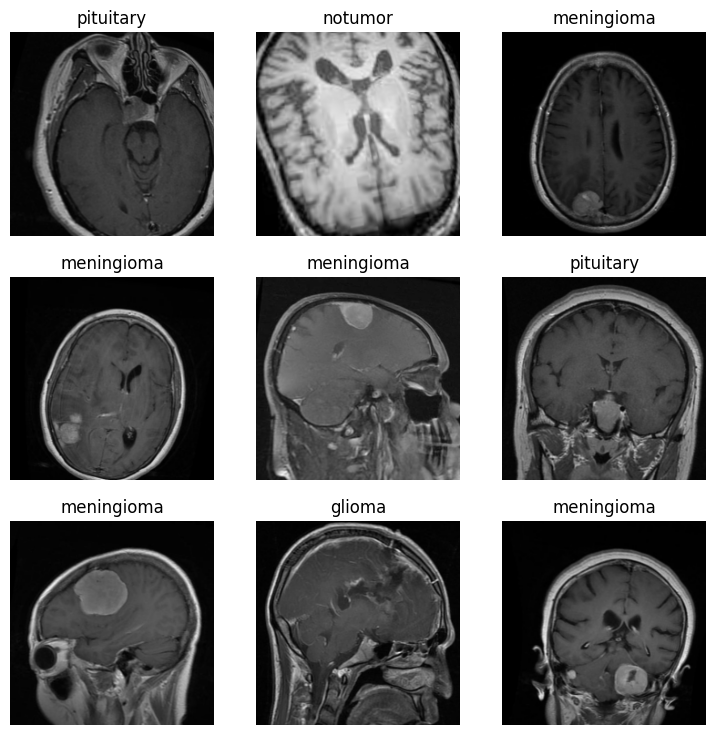

In [15]:
dls.show_batch()

## Modelling

We will use a deep neural network to build the classification model. Rather than training a network from scratch, we will modify an existing deep neural network to solve the problem of recognizing classes of brain tumors.


### Train and test the model

To create a Resnet-34 Image classification model using the dataset and perform finetuning.

In [16]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 122MB/s]


To fine-tune the pre-trained model for 5 epochs to help it learn the brain tumor features better.

In [17]:
learn.fine_tune(epochs = 5)

The table shows that after each epoch, our model continues to learn and improve:

* Training loss decreases steadily, meaning the model is making fewer mistakes on the images it trained on and is successfully learning useful patterns.

* Validation loss also decreases, indicating the model performs better on images it has never seen before. This shows it is generalizing well, not just memorizing the training data.

* Error rate drops significantly — from 14.79% to 3.5%. This confirms the model is becoming much more accurate at classifying brain tumor images.

### Assess the Model Performance

### To assess the model's performance:

To create an ClassificationInterpretation object called interp that helps us analyze the model's predictions.

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

To plot the confusion matrix, which shows the number of images in the validation set that were correctly and incorrectly classified by the model.

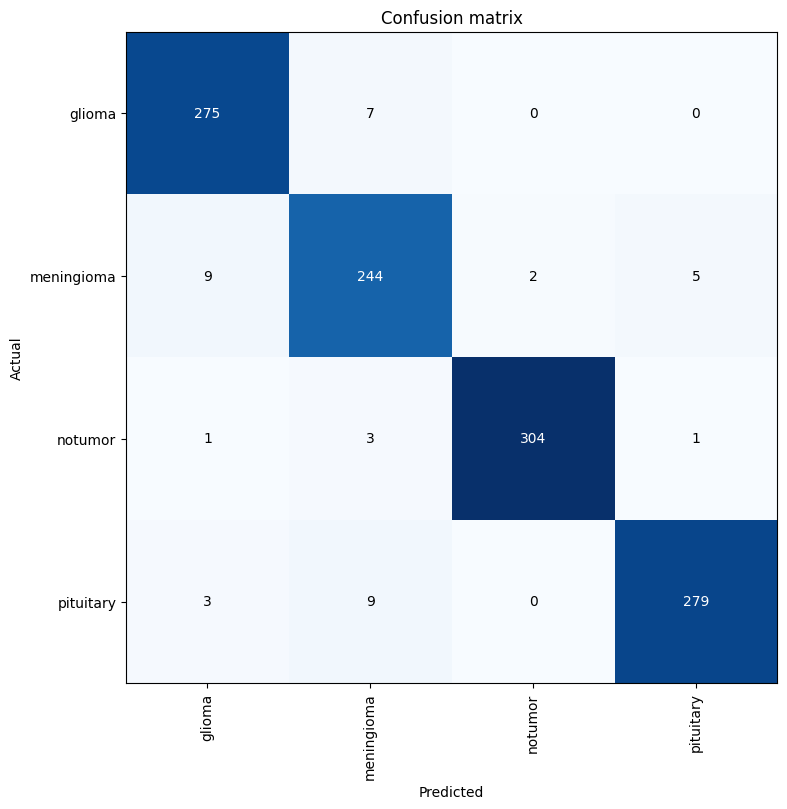

In [19]:
interp.plot_confusion_matrix(figsize=(8,8))

The confusion matrix illustrates how often the model correctly predicts each class and where it tends to make mistakes. Each row represents the actual class, while each column represents the predicted class.

* Glioma: The model correctly classified 275 out of 282 glioma images. The 6 misclassifications were mostly predicted as meningioma, suggesting some visual similarity between these two tumor types.

* Meningioma: The model correctly classified 244 out of 260 cases. Most misclassifications were 9 as glioma, with 2 mistaken as no tumor and 5 as pituitary, indicating occasional overlap in tumor characteristics.

* No Tumor: The model achieved 304 correct out of 309, with only 5 errors. This is especially important because accurately identifying when no tumor is present is critical in medical diagnosis to avoid unnecessary alarm.

* Pituitary Tumor: The model correctly predicted 279 out of 291 images, with only 12 misclassifications. This still reflects strong performance.

Overall, the majority of predictions lie along the diagonal of the confusion matrix, showing that the model performs extremely well across all four categories, with minimal confusion between classes.

### To analyze images with top losses:

Showing the top loss images to analyze where the model made the largest mistakes by having a high probability that the image was of one class.

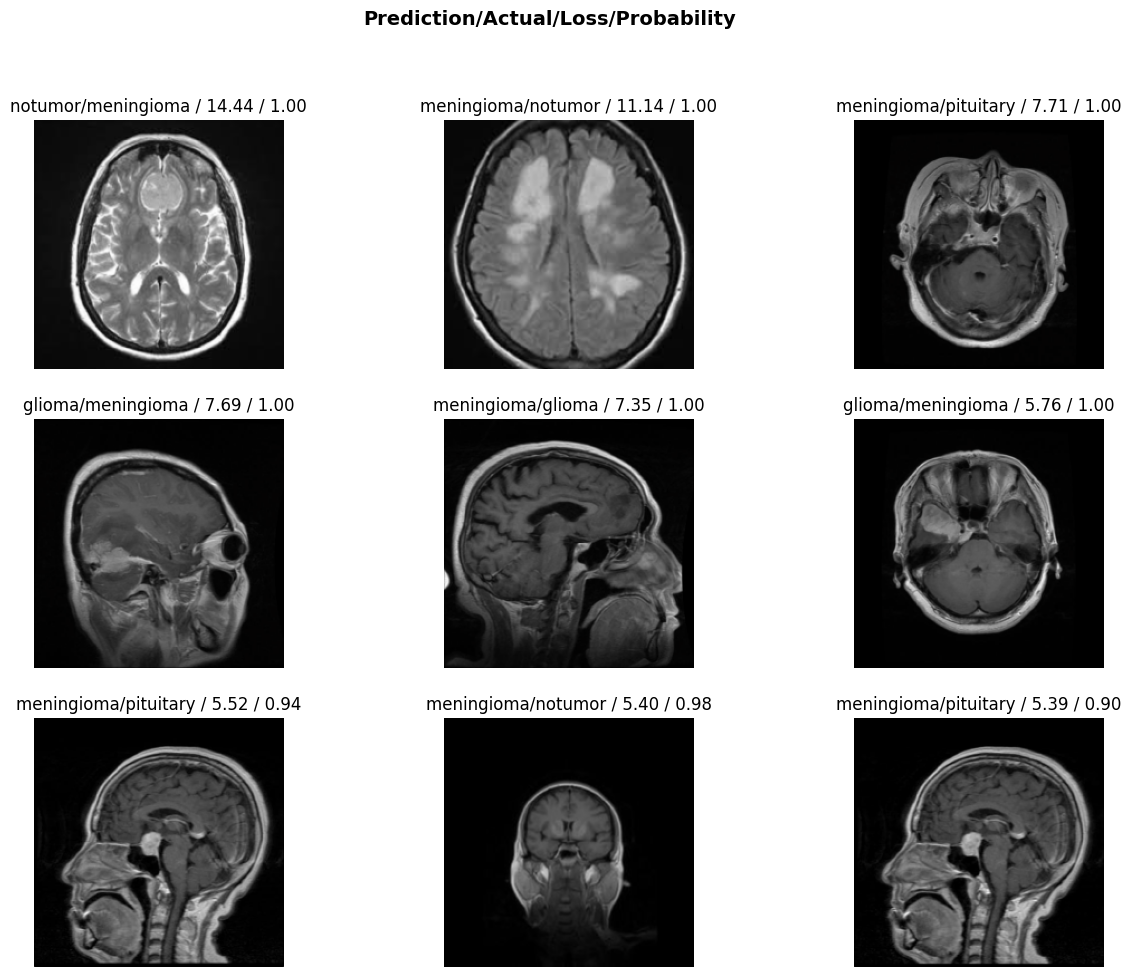

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

The top-loss images reveals cases where the model is most confident about its prediction but incorrect. These errors mostly occur between meningloma, glioma, and pituary tumors, which can appear visually in MRI scans with overlapping shapes and intensities. Also, there are small number of "no tumor" images that are misclassified due to ambiguous features that make them look similar to tumor-like structures.

For example, in the first image in the top row (middle position), the model predicted meningioma, while the true label is notumor. The loss value of 11.14 indicates a severe misclassification, and the model was 100% confident in this incorrect prediction. This highlights that the model can occasionally be strongly misled by visual features that resemble another tumor type, suggesting that certain MRI patterns may overlap across classes.

# Deployment

### Evaluating Model Performance on Test Dataset

Testing the Model on a example MRI image downloaded from the internet to predict the tumor type and plot the class probabilities.















In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
!wget https://upload.wikimedia.org/wikipedia/commons/7/7e/Corps_calleux_Sagittal.JPG -O wikinotumor.jpg

--2025-11-06 05:53:31--  https://upload.wikimedia.org/wikipedia/commons/7/7e/Corps_calleux_Sagittal.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32922 (32K) [image/jpeg]
Saving to: ‘wikinotumor.jpg’

wikinotumor.jpg     100%[===================>]  32.15K  --.-KB/s    in 0.001s  

2025-11-06 05:53:31 (25.7 MB/s) - ‘wikinotumor.jpg’ saved [32922/32922]



To loads test MRI image which predicts its tumor type using the trained model, and shows both the image and the prediction probabilities.

Prediction: notumor


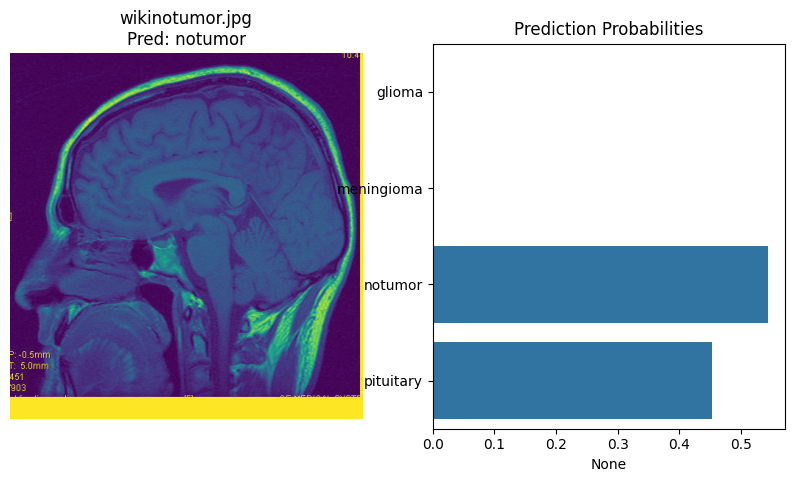

In [24]:


filename = 'wikinotumor.jpg'

test_img = PILImageBW.create(filename)

prediction, idx, probs = learn.predict(test_img)
print("Prediction:", prediction)

# Plot image + probabilities
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(test_img)
axes[0].set_title(f"{filename}\nPred: {prediction}")
axes[0].axis('off')

sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_title("Prediction Probabilities")
plt.show()



The bar chart shows how confident the model is in each of the four possible brain MRI classes. In this example, the model predicts “no tumor” with the highest probability (around 0.55), meaning it is most confident that the MRI scan does not contain a tumor. The next highest probability is assigned to the pituitary class, but still much lower than the “no tumor” prediction. Very low probabilities are assigned to meningioma and glioma, indicating the model sees very little evidence of those tumor types in this image.

This visualization helps us understand not only the final prediction but also the model’s uncertainty and how strongly it supports each possible class.

### To assess how well the model generalizes to new data, we evaluate its performance using the separate test dataset that was not used during training or validation.

In [25]:
test_path = path/'Testing'
test_files = get_image_files(test_path)

correct = 0
total = len(test_files)

for f in test_files:
    pred, _, _ = learn.predict(f)
    true_label = f.parent.name

    if pred == true_label:
        correct += 1

print(f"Testing Accuracy: {correct}/{total} = {correct/total:.2%}")


Testing Accuracy: 1283/1311 = 97.86%


To evaluate generalization performance, the trained model was tested on a completely separate set of MRI images that were not used during training or validation. The model predicted the tumor class for each image in the test dataset, and accuracy was calculated by comparing predictions with the true labels.

The model correctly classified 1,283 out of 1,311 test images, achieving an overall test accuracy of 97.86%. This confirms that the model generalizes well to unseen MRI scans and maintains strong diagnostic performance outside the training data.

### To list the files that were incorrectly classified:

In [26]:
misclassified = [(f, learn.predict(f)[0]) for f in test_files if learn.predict(f)[0] != f.parent.name]

print(f"Total misclassified: {len(misclassified)}")

for f, pred in misclassified[:10]:  # show first 10
    print(f"File: {f.name} | Actual: {f.parent.name} | Pred: {pred}")


Total misclassified: 28
File: Te-me_0254.jpg | Actual: meningioma | Pred: glioma
File: Te-me_0115.jpg | Actual: meningioma | Pred: glioma
File: Te-me_0136.jpg | Actual: meningioma | Pred: glioma
File: Te-me_0249.jpg | Actual: meningioma | Pred: glioma
File: Te-me_0193.jpg | Actual: meningioma | Pred: pituitary
File: Te-me_0011.jpg | Actual: meningioma | Pred: notumor
File: Te-me_0226.jpg | Actual: meningioma | Pred: glioma
File: Te-me_0111.jpg | Actual: meningioma | Pred: notumor
File: Te-me_0259.jpg | Actual: meningioma | Pred: glioma
File: Te-piTr_0002.jpg | Actual: pituitary | Pred: meningioma


To further investigate model errors, we examined the images in the test set that were incorrectly classified. Out of 1,311 test samples, 26 images were misclassified. The majority of errors occured among tumor categories with overlapping visual features. The majority of these errors occured among tumor categories with overlapping visual features:
* Several meningioma MRIs were incorrectly predicted as glioma or pituitary.
* A small number of meningioma cases were misclassified as no tumor.
* A few pituitary tumors were predicted as meningioma or glioma.

Note: In the test, there were no MRIs showing a picture of a healthy brain that were incorrectly predicted as a tumor. This is very clinically significant because faslse positives in medical diagnosis can lead to unecnessary patient stress and medical procedures.

## Conclusion

This high accuracy suggests that the model is able to generalize well to new MRI scans and could be a vital tool in assisting radiologists in identifying brain tumor types. .
 Of course, some misclassifications still occurred — especially where tumors were less visually clear or closely resemble other tumor types — which I explored earlier with the Top Losses plot.
